In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
fp = 'data/raw/concatenated_abridged.jsonl'
data = [json.loads(line) for line in open(fp, 'r')]

In [3]:
tweet_df = pd.DataFrame(data)

In [4]:
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
0,Tue Sep 29 23:59:56 +0000 2020,1311093385688735744,1311093385688735744,Biden a professional debater?? Hardly!! More ...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 117904481, 'id_str': '117904481', 'name...",None,None,None,None,True,1.311081e+18,1311081374510710784,"{'url': 'https://t.co/cQuxzexXYt', 'expanded':...",{'created_at': 'Tue Sep 29 23:12:13 +0000 2020...,0,0,False,False,False,en,NaN,NaN,NaN
1,Tue Sep 29 23:59:58 +0000 2020,1311093394400333824,1311093394400333824,RT @DarDar458: #PresidentialDebate #Debates202...,False,"[0, 73]","{'hashtags': [{'text': 'PresidentialDebate', '...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 30140760, 'id_str': '30140760', 'name':...",None,None,None,None,True,1.311068e+18,1311068232976080896,"{'url': 'https://t.co/GOhLaDJLeN', 'expanded':...",NaN,1,0,False,False,NaN,und,{'created_at': 'Tue Sep 29 23:55:42 +0000 2020...,NaN,NaN
2,Wed Sep 30 00:00:00 +0000 2020,1311093401652277252,1311093401652277252,How can Biden stand a chance against Trump in ...,False,"[0, 280]","{'hashtags': [{'text': 'VarneyCo', 'indices': ...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,None,NaN,None,None,"{'id': 281610530, 'id_str': '281610530', 'name...",None,None,None,None,False,NaN,NaN,NaN,NaN,25,100,False,False,False,en,NaN,"{'media': [{'id': 1310969778111217665, 'id_str...",NaN
3,Wed Sep 30 00:00:02 +0000 2020,1311093410737070086,1311093410737070086,RT @abbydphillip: Very reminiscent of pre-2018...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 88223320, 'id_str': '88223320', 'name':...",None,None,None,None,True,1.311075e+18,1311075316996157441,"{'url': 'https://t.co/CdP89boyMD', 'expanded':...",NaN,351,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 23:00:28 +0000 2020...,NaN,NaN
4,Wed Sep 30 00:00:04 +0000 2020,1311093419100561408,1311093419100561408,RT @RudyGiuliani: Why was Corrupt Biden’s son ...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 44295160, 'id_str': '44295160', 'name':...",None,None,None,None,False,NaN,NaN,NaN,NaN,15672,0,False,False,NaN,en,{'created_at': 'Tue Sep 29 19:07:59 +0000 2020...,NaN,NaN


In [5]:
tweet_df.shape

(140337, 32)

In [6]:
tweet_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count,favorite_count
count,1.403370e+05,1.911200e+04,2.018100e+04,2.445300e+04,140337.000000,140337.000000
mean,1.311632e+18,1.311030e+18,2.720200e+17,1.292243e+18,21028.815494,4.915340
std,3.196392e+14,1.499556e+16,4.697827e+17,1.109337e+17,66438.946038,661.171293
min,1.311093e+18,7.109434e+17,1.688000e+03,7.464299e+09,0.000000,0.000000
25%,1.311355e+18,1.311300e+18,2.507388e+07,1.311144e+18,2.000000,0.000000
50%,1.311635e+18,1.311515e+18,1.949458e+08,1.311459e+18,859.000000,0.000000
75%,1.311907e+18,1.311869e+18,7.296761e+17,1.311789e+18,11553.000000,0.000000
max,1.312181e+18,1.312180e+18,1.312070e+18,1.312178e+18,452964.000000,189361.000000


In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140337 entries, 0 to 140336
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   created_at                 140337 non-null  object 
 1   id                         140337 non-null  int64  
 2   id_str                     140337 non-null  object 
 3   full_text                  140337 non-null  object 
 4   truncated                  140337 non-null  bool   
 5   display_text_range         140337 non-null  object 
 6   entities                   140337 non-null  object 
 7   source                     140337 non-null  object 
 8   in_reply_to_status_id      19112 non-null   float64
 9   in_reply_to_status_id_str  19112 non-null   object 
 10  in_reply_to_user_id        20181 non-null   float64
 11  in_reply_to_user_id_str    20181 non-null   object 
 12  in_reply_to_screen_name    20181 non-null   object 
 13  user                       14

## Takeout obviously needless columns

In [8]:
tweet_df.contributors

0         None
1         None
2         None
3         None
4         None
          ... 
140332    None
140333    None
140334    None
140335    None
140336    None
Name: contributors, Length: 140337, dtype: object

In [9]:
tweet_df.contributors.value_counts()

Series([], Name: contributors, dtype: int64)

In [10]:
def observe_where_notNAN(df, col):
    mask = df[col].apply(lambda x: type(x).__name__) != 'NoneType'
    out = df[mask].copy()
    return out

In [11]:
observe_where_notNAN(tweet_df, 'geo')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
30188,Wed Sep 30 14:44:24 +0000 2020,1311315968908554241,1311315968908554241,Donald Trump refused to denounce white suprema...,False,"[0, 173]","{'hashtags': [{'text': 'BidenHarris2020', 'ind...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 14213115, 'id_str': '14213115', 'name':...","{'type': 'Point', 'coordinates': [33.0, -83.5]}","{'type': 'Point', 'coordinates': [-83.5, 33.0]}","{'id': '7142eb97ae21e839', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN
111464,Fri Oct 02 09:04:54 +0000 2020,1311955307036278784,1311955307036278784,Trump 👥 🙏 💙 🇺🇸 🌎 @ United States https://t.co/...,False,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 964795553610588162, 'id_str': '96479555...","{'type': 'Point', 'coordinates': [40.0, -100.0]}","{'type': 'Point', 'coordinates': [-100.0, 40.0]}","{'id': '27c45d804c777999', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN


In [12]:
observe_where_notNAN(tweet_df, 'coordinates')

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,extended_entities,withheld_in_countries
30188,Wed Sep 30 14:44:24 +0000 2020,1311315968908554241,1311315968908554241,Donald Trump refused to denounce white suprema...,False,"[0, 173]","{'hashtags': [{'text': 'BidenHarris2020', 'ind...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 14213115, 'id_str': '14213115', 'name':...","{'type': 'Point', 'coordinates': [33.0, -83.5]}","{'type': 'Point', 'coordinates': [-83.5, 33.0]}","{'id': '7142eb97ae21e839', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN
111464,Fri Oct 02 09:04:54 +0000 2020,1311955307036278784,1311955307036278784,Trump 👥 🙏 💙 🇺🇸 🌎 @ United States https://t.co/...,False,"[0, 56]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,None,NaN,None,None,"{'id': 964795553610588162, 'id_str': '96479555...","{'type': 'Point', 'coordinates': [40.0, -100.0]}","{'type': 'Point', 'coordinates': [-100.0, 40.0]}","{'id': '27c45d804c777999', 'url': 'https://api...",None,False,NaN,NaN,NaN,NaN,0,0,False,False,False,en,NaN,NaN,NaN


In [13]:
tweet_df.drop(columns=['contributors', 'coordinates', 'geo'], inplace=True)

In [14]:
place_df = observe_where_notNAN(tweet_df, 'place')
place_df.place.iloc[0]

{'id': '5c937363480a2c19',
 'url': 'https://api.twitter.com/1.1/geo/id/5c937363480a2c19.json',
 'place_type': 'city',
 'name': 'Cedar Park',
 'full_name': 'Cedar Park, TX',
 'country_code': 'US',
 'country': 'United States',
 'contained_within': [],
 'bounding_box': {'type': 'Polygon',
  'coordinates': [[[-97.8816996, 30.4555355],
    [-97.74559, 30.4555355],
    [-97.74559, 30.556381],
    [-97.8816996, 30.556381]]]},
 'attributes': {}}

In [15]:
#looks like we can drop this - also rows where not in US?
place_df.place.apply(lambda d: d['country_code']).value_counts()

US    644
CA     25
GB     16
AU     10
BR      9
NL      7
CO      6
AR      5
NG      5
DE      4
IT      4
ID      3
KE      3
FR      3
JM      2
ES      2
IE      2
AE      2
TR      2
CL      2
MX      2
BD      1
ZW      1
FI      1
ZA      1
EG      1
IQ      1
LU      1
IN      1
NZ      1
SE      1
CZ      1
PY      1
TW      1
DJ      1
UG      1
DK      1
GN      1
CY      1
VN      1
BE      1
Name: place, dtype: int64

In [16]:
tweet_df = tweet_df[tweet_df.place.apply(lambda d: d['country_code'] if type(d).__name__ != 'NoneType' else 'US') == 'US']

In [17]:
#additionally probably drop tweets with these rows?
tweet_df.withheld_in_countries.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[DE]        23
[DE, FR]    10
[IN]         2
[TR]         1
Name: withheld_in_countries, dtype: int64

In [18]:
tweet_df[tweet_df.withheld_in_countries.apply(lambda l: type(l).__name__=='list')].full_text.iloc[1]

'RT @carrieksada: You started this sh!t show Chris Wallace. You and your stupid question on White Supremacists. \nYou are a total dumpster fi…'

In [19]:
#maybe just super aggro? keep for now
tweet_df.drop(columns=['withheld_in_countries'], inplace=True)

## Legit Data Exploration

In [20]:
tweet_df.created_at.value_counts()

Fri Oct 02 07:33:11 +0000 2020    3
Fri Oct 02 23:37:28 +0000 2020    3
Fri Oct 02 04:57:01 +0000 2020    2
Fri Oct 02 05:04:49 +0000 2020    2
Thu Oct 01 14:11:25 +0000 2020    2
                                 ..
Thu Oct 01 15:44:29 +0000 2020    1
Fri Oct 02 19:19:28 +0000 2020    1
Thu Oct 01 01:27:37 +0000 2020    1
Fri Oct 02 22:34:49 +0000 2020    1
Thu Oct 01 09:28:42 +0000 2020    1
Name: created_at, Length: 139847, dtype: int64

In [21]:
tweet_df['created_at'] = pd.to_datetime(tweet_df.created_at)

In [22]:
#Tweets follow initial 3 days following first Pres Debate
tweet_df.created_at.max() - tweet_df.created_at.min()

Timedelta('2 days 23:59:58')

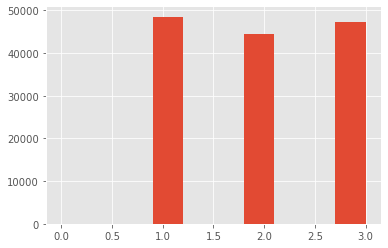

In [23]:
day_dic = {29:0, 30:1, 1:2, 2:3}
tweet_days = tweet_df.created_at.apply(lambda dt: day_dic[dt.day]).hist()

In [24]:
#can also drop these columns
tweet_df.id.nunique()

140203

In [25]:
tweet_df.id_str.nunique()

140203

In [26]:
tweet_df.truncated.value_counts()

False    140203
Name: truncated, dtype: int64

In [27]:
tweet_df.drop(columns=['id', 'id_str', 'truncated'], inplace=True)

In [28]:
#This looks like we can drop it
tweet_df.display_text_range.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[0, 140]     49232
[0, 139]      8068
[0, 44]       4680
[0, 144]      2051
[0, 112]      1134
             ...  
[34, 152]        1
[5, 142]         1
[27, 239]        1
[5, 133]         1
[24, 109]        1
Name: display_text_range, Length: 8884, dtype: int64

In [29]:
tweet_df[tweet_df.display_text_range.apply(lambda l: l == [24, 109])].full_text.values

array(['@CheriJacobus @JoeBiden I guess this is more appropriate for today than 4 days ago. \n\nhttps://t.co/XL3GIDKyfW'],
      dtype=object)

In [30]:
tweet_df[tweet_df.display_text_range.apply(lambda l: l == [0, 140])].full_text.values[0]

'RT @KamalaHarris: At 9pm ET tonight, @JoeBiden will face off against Donald Trump in their first of three debates. I know Joe is going to b…'

In [31]:
#do
tweet_df.entities.iloc[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/cQuxzexXYt',
   'expanded_url': 'https://twitter.com/IngrahamAngle/status/1311081374510710784',
   'display_url': 'twitter.com/IngrahamAngle/…',
   'indices': [72, 95]}]}